In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
import plotly as py
import colorlover as cl
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


### Read CSV file for mall customer data and making customer_id as index column


In [94]:
df=pd.read_csv("../input/Mall_Customers.csv", index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### To extract data types

In [95]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### 1.To check is there any missing values . 
#### 2.To check statistical values. 
#### 3.Renamed data headers. 
#### 4.Replace gender to numerical value.

In [96]:
df.isnull().sum()
df.describe()
df=df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'annual income','Spending Score (1-100)':'spending score'})
df['gender'].replace(['Female','Male'],[0,1],inplace=True)
df.head()


,gender,age,annual income,spending score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


#### Store mean and standard deviation value for unscaling

In [97]:

df.mean()
df.std()
dfsp=pd.concat([df.mean(),df.std()],axis=1).transpose()

dfsp.index = ['mean', 'std']
dfsp


,gender,age,annual income,spending score
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522


#### new dataframe with scaled values

In [98]:

df_scaled=pd.DataFrame()
for c in df.columns:
    if(c=='gender'): df_scaled[c] = df[c]
    else: df_scaled[c] = (df[c] - dfsp.loc['mean',c]) / dfsp.loc['std',c]
df_scaled.head()
  

,gender,age,annual income,spending score
CustomerID,,,,
1,1,-1.421003,-1.734646,-0.433713
2,1,-1.277829,-1.734646,1.192711
3,0,-1.349416,-1.696572,-1.711618
4,0,-1.134655,-1.696572,1.037814
5,0,-0.561958,-1.658498,-0.394989


#### Making different dataframes based on gender values male and female

In [99]:
dff=df_scaled.loc[df_scaled.gender==0].iloc[:,1:]
dff
dfm=df_scaled.loc[df_scaled.gender==1].iloc[:,1:]
dfm


,age,annual income,spending score
CustomerID,,,
1,-1.421003,-1.734646,-0.433713
2,-1.277829,-1.734646,1.192711
9,1.800414,-1.582351,-1.827791
11,2.015175,-1.582351,-1.401823
15,-0.132436,-1.544277,-1.440547
16,-1.206242,-1.544277,1.115262
18,-1.349416,-1.506203,0.611845
19,0.941370,-1.430055,-0.820957
21,-0.275610,-1.391981,-0.588611


#### To check what value should be used for no of clusters in Kmeans clustering by using elbow plotting graph

Text(0.5, 1.0, 'Male')

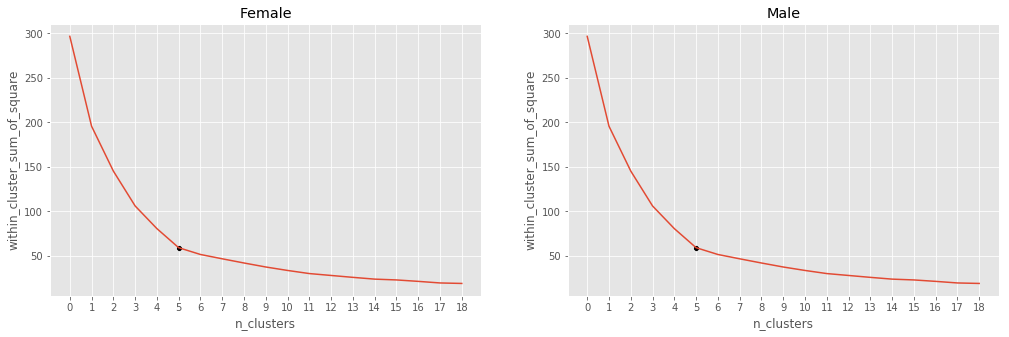

In [100]:
def no_of_clusters(df):
    inertia = []
    for i in range(1,20):
        km=KMeans(n_clusters=i,random_state=0)
        km.fit(dff)
        inertia.append(km.inertia_)
        df_elbow=pd.DataFrame(inertia)
        df_elbow=df_elbow.reset_index()
        df_elbow
        df_elbow.columns= ['n_clusters', 'within_cluster_sum_of_square']
        df_elbow
    return df_elbow

dff_elbow=no_of_clusters(dff)
dfm_elbow=no_of_clusters(dfm)
dfm_elbow

fig,ax=plt.subplots(1,2,figsize=(17,5))

sns.lineplot(data=dff_elbow,x='n_clusters',y='within_cluster_sum_of_square',ax=ax[0])
sns.scatterplot(data=dff_elbow[5:6],x='n_clusters',y='within_cluster_sum_of_square',color='black',ax=ax[0])
ax[0].set(xticks=dff_elbow.index)
ax[0].set_title('Female')

sns.lineplot(data=dfm_elbow,x='n_clusters',y='within_cluster_sum_of_square',ax=ax[1])
sns.scatterplot(data=dfm_elbow[5:6],x='n_clusters',y='within_cluster_sum_of_square',color='black',ax=ax[1])
ax[1].set(xticks=dfm_elbow.index)
ax[1].set_title('Male')













#### Kmeans model building and predicting and extracting dataframes

In [101]:


def k_means(n_clusters, df, gender):

    kmf = KMeans(n_clusters=n_clusters, random_state=0) #defining the algorithm
    kmf.fit_predict(df) #fitting and predicting
    centroids = kmf.cluster_centers_ #extracting the clusters' centroids
    cdf = pd.DataFrame(centroids, columns=df.columns) #stocking in dataframe
    cdf['gender'] = gender
    return cdf

df1 = k_means(5, dff, 'female')
df2 = k_means(5, dfm, 'male')
dfc_scaled = pd.concat([df1, df2])
dfc_scaled


,age,annual income,spending score,gender
0,0.982586,-0.497822,-0.308152,female
1,-0.766845,-0.370551,-0.297510,female
2,-0.451324,0.940910,1.176869,female
3,-0.958440,-1.327549,1.174838,female
4,0.411626,1.209734,-1.107517,female
0,1.280745,-0.035423,-0.285987,male
1,-0.398899,1.010904,1.257252,male
2,-1.019493,-0.756313,0.436744,male
3,1.191924,-1.391981,-1.511542,male
4,-0.362537,1.006674,-1.545656,male


#### Unscaling dataframe by using previously stored mean and standard deviation

In [102]:
#UNSCALING
dfc = pd.DataFrame()
for c in dfc_scaled.columns:
    if(c=='gender'): dfc[c] = dfc_scaled[c]
    else: 
        dfc[c] = (dfc_scaled[c] * dfsp.loc['std', c] + dfsp.loc['mean', c])
        dfc[c] = dfc[c].astype(int)
        
dfc

,age,annual income,spending score,gender
0,52,47,42,female
1,28,50,42,female
2,32,85,80,female
3,25,25,80,female
4,44,92,21,female
0,56,59,42,male
1,33,87,82,male
2,24,40,61,male
3,55,24,11,male
4,33,87,10,male


In [103]:
dfcf = dfc[dfc.gender=='female']
dfcf
dfcm = dfc[dfc.gender=='male']
dfcm
dfcf.dtypes

age                int64
annual income      int64
spending score     int64
gender            object
dtype: object

#### Plot 3d scatter plot for spending score ,annual income,age and to see all clusters data

In [104]:
def plot(dfs, names,colors, title):

    data_to_plot = []
    
    for i, df in enumerate(dfs):

        x = df['spending score']
        y = df['annual income']
        z = df['age']
        data = go.Scatter3d(x=x , y=y , z=z , mode='markers', name=names[i], marker = colors[i])
        data_to_plot.append(data)
        layout = go.Layout(margin=dict(l=0,r=0,b=0,t=40),
        title= title, scene = dict(xaxis = dict(title  = x.name,), 
        yaxis = dict(title  = y.name), zaxis = dict(title = z.name)))

    fig = go.Figure(data=data_to_plot, layout=layout)
    py.offline.iplot(fig)
    purple = dict(color=cl.scales['9']['seq']['RdPu'][3:8])
    blue   = dict(color=cl.scales['9']['seq']['Blues'][3:8])
    
plot([dfcf, dfcm], names=['male', 'female'], colors=[purple, blue], title = 'Clusters - All Targets')
  
        

#### To group customers which is having annual income greater than 40 and spending score is more than 40.
#### In this way will create three clusters based on similar charecteristics.

In [105]:
dfc=dfc[(dfc['annual income'] > 40) & (dfc['spending score'] > 40)]
dfc=dfc.sort_values('age').reset_index(drop=True)
dfc


,age,annual income,spending score,gender
0,28,50,42,female
1,32,85,80,female
2,33,87,82,male
3,52,47,42,female
4,56,59,42,male


In [106]:


dfcf = dfc[dfc.gender=='female']
dfcm = dfc[dfc.gender=='male']
purple = dict(color=cl.scales['9']['seq']['RdPu'][3:8])
blue = dict(color=cl.scales['9']['seq']['Blues'][3:8])
plot([dfcf, dfcm], names=['male', 'female'], colors=[purple, blue], title = 'Clusters - Primary Targets')

In [107]:
df1 = dfc.iloc[[0], :]
df1
df2 = dfc.iloc[[1,2], :]
df2
df3 = dfc.iloc[[3,4], :]
df3

names = ['younger women - moderated spenders', 'rich & independant young adults', 'parents - moderated spenders']

colors = []
for i in [1, 3, 5]: 
    colors.append(dict(color = cl.scales['11']['qual']['Paired'][i]))

plot([df1, df2, df3], names=names, colors=colors, title = 'Marketing Clusters - Primary Targets')
